<h1>Исследование объявлений о продаже квартир<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Для-твоих-вопросов-или-комментариев-оставлю-такую-ячейку,-чтобы-было-удобнее-взаимодействовать-на-проекте" data-toc-modified-id="Для-твоих-вопросов-или-комментариев-оставлю-такую-ячейку,-чтобы-было-удобнее-взаимодействовать-на-проекте-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Для твоих вопросов или комментариев оставлю такую ячейку, чтобы было удобнее взаимодействовать на проекте</a></span><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Изменение-типа-данных" data-toc-modified-id="Изменение-типа-данных-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Изменение типа данных</a></span></li><li><span><a href="#Устранение-неявных-дубликатов" data-toc-modified-id="Устранение-неявных-дубликатов-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Устранение неявных дубликатов</a></span></li><li><span><a href="#Обработка-аномальных-значений" data-toc-modified-id="Обработка-аномальных-значений-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Обработка аномальных значений</a></span></li><li><span><a href="#check-gap" data-toc-modified-id="check-gap-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>check gap</a></span></li></ul></li><li><span><a href="#Добавление-новых-столбцов" data-toc-modified-id="Добавление-новых-столбцов-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Добавление новых столбцов</a></span></li><li><span><a href="#Исследовательский-анализ" data-toc-modified-id="Исследовательский-анализ-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Исследовательский анализ</a></span><ul class="toc-item"><li><span><a href="#Исседование-параметров" data-toc-modified-id="Исседование-параметров-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Исседование параметров</a></span><ul class="toc-item"><li><span><a href="#example-3" data-toc-modified-id="example-3-1.4.1.1"><span class="toc-item-num">1.4.1.1&nbsp;&nbsp;</span>example 3</a></span></li></ul></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Бонус" data-toc-modified-id="Бонус-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Бонус</a></span></li></ul></li></ul></div>

**Введение**

Для исследования получены данные сервиса Яндекс.Недвижимость – архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет.

**Цель исследования**

1. Открыть файл с данными и изучить общую информацию.


2. Выполнить предобработку данных.


3. Добавить новые столбцы с зданными параметрами.


4. Провести исследовательский анализ данных. 


5. Написать общий вывод.

**Ход исследования**

Данные дял исследования получены из файла `real_estate_data`. О качестве данных ничего не известно, поэтому перед исследованием понадобится тщательная предобработка.

**Этапы исследования** 

1. Обзор данных 

2. Предобработка данных

3. Добавление новых столбцов

4. Исследовательский анализ

## Обзор данных

Выгрузим данные файла `real_estate_data.csv` в переменную `data` и посмотрим общую информацию.

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
pth1 = '/datasets/real_estate_data.csv'
pth2 = 'real_estate_data.csv'

if os.path.exists(pth1):
    data = pd.read_csv(pth1, sep = '\t' )
elif os.path.exists(pth2):
    data = pd.read_csv(pth2, sep = '\t' )
else:
    print('Something is wrong')
    
data.head(5)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Общая информацию о полученном датафрейме.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Информация о столбцах

* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)


* `balcony` — число балконов


* `ceiling_height` — высота потолков (м)


* `cityCenters_nearest` — расстояние до центра города (м)


* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)


* `first_day_exposition` — дата публикации


* `floor` — этаж


* `floors_total` — всего этажей в доме


* `is_apartment` — апартаменты (булев тип)


* `kitchen_area` — площадь кухни в квадратных метрах (м²)


* `last_price` — цена на момент снятия с публикации


* `living_area` — жилая площадь в квадратных метрах (м²)


* `locality_name` — название населённого пункта


* `open_plan` — свободная планировка (булев тип)


* `parks_around3000` — число парков в радиусе 3 км


* `parks_nearest` — расстояние до ближайшего парка (м)


* `ponds_around3000` — число водоёмов в радиусе 3 км


* `ponds_nearest` — расстояние до ближайшего водоёма (м)


* `rooms` — число комнат


* `studio` — квартира-студия (булев тип)


* `total_area` — общая площадь квартиры в квадратных метрах (м²)


* `total_images` — число фотографий квартиры в объявлении

Построим общую гистограмму для всех числовых столбцов.

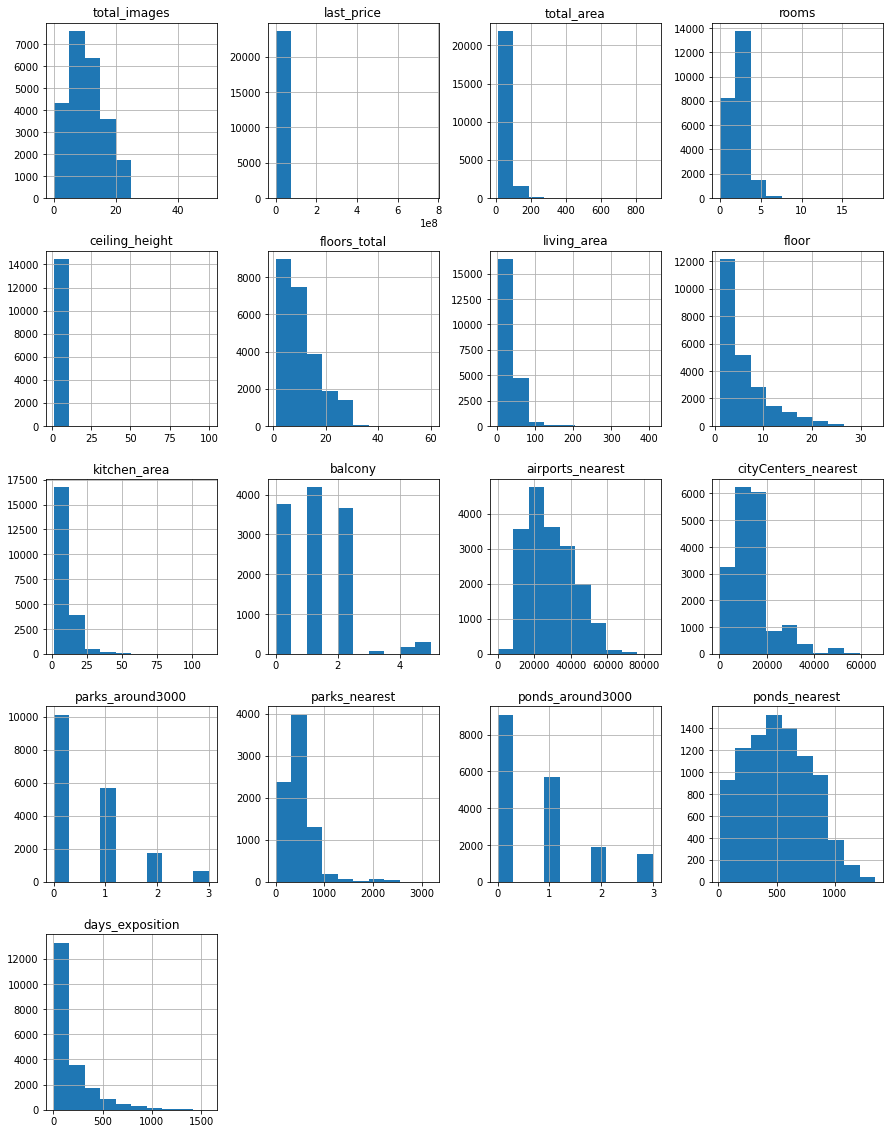

In [4]:
data.hist(figsize = (15,20));

## Предобработка данных

##### example 2

Опредлим в каких столбцах есть пропуски. 

In [5]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Получим общее количество строк.

In [6]:
print(f'Общее количество строк: {data.shape[0]}')

Общее количество строк: 23699


Пропуски имеются в столбцах:

* `ceiling_height`


* `floors_total`


* `living_area`


* `is_apartment`


* `kitchen_area`


* `balcony`


* `locality_name`


* `airports_nearest`


* `cityCenters_nearest`


* `parks_around3000`


* `parks_nearest` 


* `ponds_around3000`


* `ponds_nearest` 


* `days_exposition`

In [7]:
def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) ')

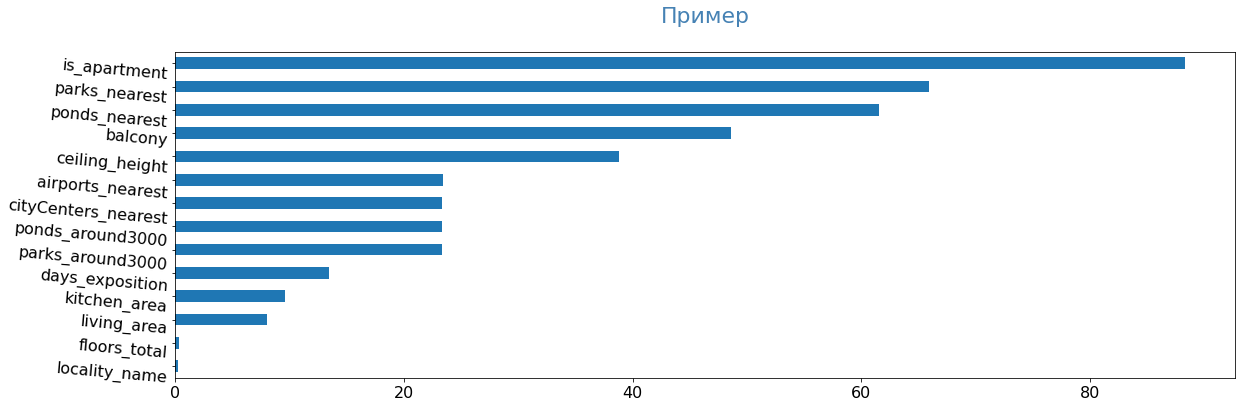

In [8]:
pass_value_barh(data)

Построим столбчатую диаграмму процентного значения пропусков.

In [9]:
def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), legend = False, fontsize = 16)
            .set_title('Процент пропусков', fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :)')

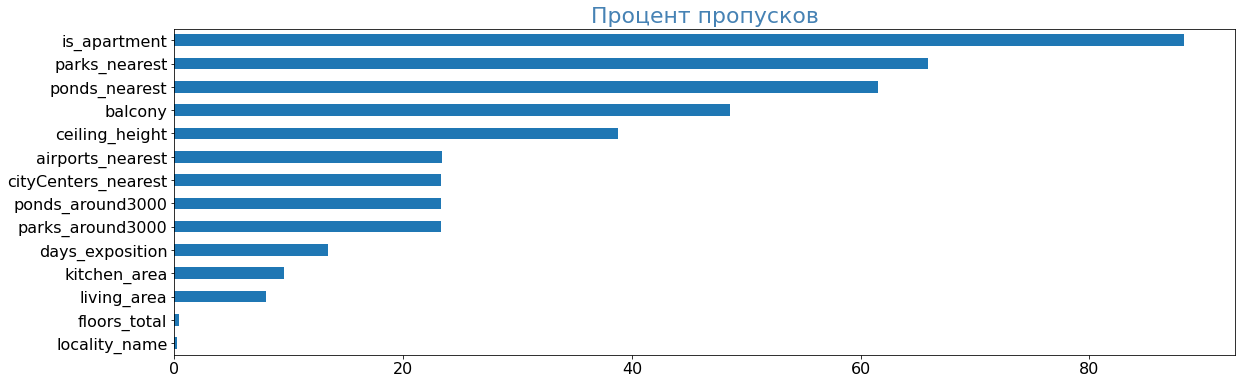

In [10]:
pass_value_barh(data)

Попробуем заполнить пропущенные значеничия и обосновать их. 

**Столбец** – `ceiling_height`

In [11]:
print(f'Количество пропусков: {data["ceiling_height"].isna().sum()}')

Количество пропусков: 9195


Возможные причины пропусков: 
* Пользователь не указал данные по разным причичнам

* У пользователя стандартная высота потолков

* При подготовке для обработки данных произошла утечка

Так как данные количественные, лучше всего заполнить пропуски `медианным значением`. При таком методе наши исследования не будут искажены.

In [12]:
# заполнение пропущенных значений медианной
data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = data['ceiling_height'].median()
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.724358,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,0.988298,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.700000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


**Столбец** – `floors_total`

In [13]:
print(f'Количество пропусков: {data["floors_total"].isna().sum()}')

Количество пропусков: 86


Возможные причины пропусков:
* Пользователь не указал данные по разным причичнам

* При подготовке для обработки данных произошла утечка

Так как логической замены нет, оставим данные без изменений.

**Столбец** – `living_area`

In [14]:
print(f'Количество пропусков: {data["living_area"].isna().sum()}')

Количество пропусков: 1903


Возможные причины пропусков:
* Пользователь не указал данные по разным причичнам

* При подготовке для обработки данных произошла утечка

Так как логической замены нет, оставим данные без изменений.

**Столбец** – `is_apartment`

In [15]:
print(f'Количество пропусков: {data["is_apartment"].isna().sum()}')

Количество пропусков: 20924


Возможные причины пропусков:
* Пользователь не указал данные, так как квартира не явлеятся апартаментами

* При подготовке для обработки данных произошла утечка

Тат как вероятнее всего пользователь не указал данные по причине – `квартира не является апартаментами`, то правильно будет заменить пропущеные значения на `False`.

In [16]:
data.loc[data['is_apartment'].isna(), 'is_apartment'] =  False

**Столбец** – `kitchen_area`

In [17]:
print(f'Количество пропусков: {data["kitchen_area"].isna().sum()}')

Количество пропусков: 2278


Возможные причины пропусков:
* Пользователь не указал данные по разным причичнам

* При подготовке для обработки данных произошла утечка

* Квартира может находится в новостройке без отделки

Так как логичной замены нет, оставим данные без изменений.

**Столбец** – `balcony`

In [18]:
print(f'Количество пропусков: {data["balcony"].isna().sum()}')

Количество пропусков: 11519


Возможные причины пропусков:
* Пользователь не указал данные, так как в его кравртире балконов – нет

* При подготовке для обработки данных произошла утечка

Тат как вероятнее всего пользователь не указал данные по причине – `в квартира нет балкона`, то правильно будет заменить пропущеные на `0`.

In [19]:
data.loc[data['balcony'].isna(), 'balcony'] =  0

**Столбец** – `locality_name`

In [20]:
print(f'Количество пропусков: {data["locality_name"].isna().sum()}')

Количество пропусков: 49


Возможные причины пропусков

* При подготовке для обработки данных произошла утечка

Так как логичной замены нет, оставим данные без изменений.

**Столбец** – `airports_nearest`

In [21]:
print(f'Количество пропусков: {data["airports_nearest"].isna().sum()}')

Количество пропусков: 5542


Возможные причины пропусков:

* При подготовке для обработки данных произошла утечка

* Ближайший аэропорт находится очень далеко

Так как логичной замены нет, оставим данные без изменений.

**Столбец** – `cityCenters_nearest`

In [22]:
print(f'Количество пропусков: {data["cityCenters_nearest"].isna().sum()}')

Количество пропусков: 5519


Возможные причины пропусков:


* При подготовке для обработки данных произошла утечка

* Так как квартира находится в населенном пункте, деревне и т.д, то данное значение не указывается

Так как логичной замены нет, оставим данные без изменений.

**Столбец** – `parks_around3000`

In [23]:
print(f'Количество пропусков: {data["parks_around3000"].isna().sum()}')

Количество пропусков: 5518


Возможные причины пропусков:

* При подготовке для обработки данных произошла утечка

* Рядом с квартирой остутсвуют парки в радиусе 3 км

Так как логичной замены нет, оставим данные без изменений.

**Столбец** – `parks_nearest`

In [24]:
print(f'Количество пропусков: {data["parks_nearest"].isna().sum()}')

Количество пропусков: 15620


Возможные причины пропусков:

* При подготовке для обработки данных произошла утечка

* Рядом с квартирой остутсвуют парки

Так как логичной замены нет, оставим данные без изменений.

**Столбец** – `ponds_around3000`

In [25]:
print(f'Количество пропусков: {data["ponds_around3000"].isna().sum()}')

Количество пропусков: 5518


Возможные причины пропусков:

* При подготовке для обработки данных произошла утечка

* Рядом с квартирой остутсвуют водоемы в радиусе 3 км

Так как логичной замены нет, оставим данные без изменений.

**Столбец** – `ponds_nearest`

In [26]:
print(f'Количество пропусков: {data["ponds_nearest"].isna().sum()}')

Количество пропусков: 14589


Возможные причины пропусков:

* При подготовке для обработки данных произошла утечка

* Рядом с квартирой остутсвуют водоемы

Так как логичной замены нет, оставим данные без изменений.

**Столбец** – `days_exposition`

In [27]:
print(f'Количество пропусков: {data["days_exposition"].isna().sum()}')

Количество пропусков: 3181


Возможные причины пропусков:

* При подготовке для обработки данных произошла утечка

* Квартиры еще не проданы

Так как скорее всего пропуски обусловлены тем, что квартира еще не продана, то правильно будет оставить пропущенные значения нетронутыми.

### Изменение типа данных

Найдем столбцы, в котрых требуется изменить тип данных.

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Необходимо изменить тип данных в столбцах: `is_apartment`, `balcony`, так как столбец `balcony` – должен быть типа `int`, а столбец `is_apartment` – должен быть типа `bool`.        

In [29]:
data['balcony'] = data['balcony'].astype('int64')
data['is_apartment'] = data['is_apartment'].astype('bool')

### Устранение неявных дубликатов

Изучим столбец `locality_name` на неявные дубликаты.

In [30]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

В данных часто встречается чередования одного и того же населенного пункта, но через разные буквы – `е` и `ё`. Исправим данную проблему.

In [31]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')

Также встречаются одинаковые поселки, но по-разному записанные:

`поселок городского типа` – `городской поселок`;

исправим данную проблему.


In [32]:
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа', 'городской поселок')

In [33]:
data.locality_name.nunique()

323

### Обработка аномальных значений

Для поиска аномальных значений воспользуемся диаграммой размаха. Построим диаграмму для всех количественных значений, и определим аномальные значений в столбцах.

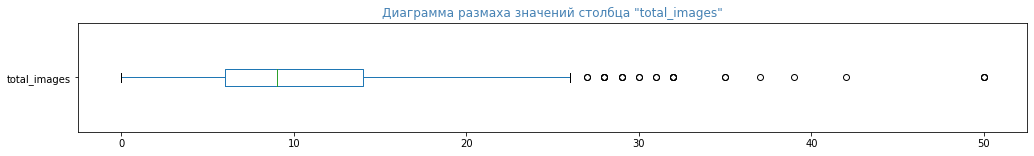

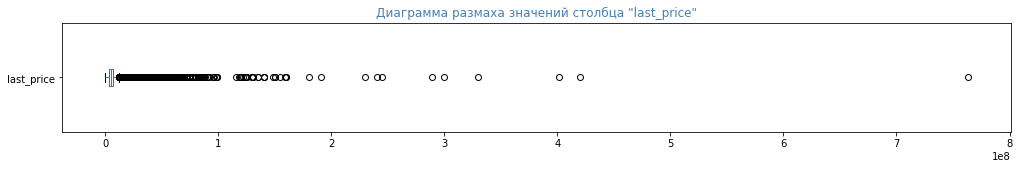

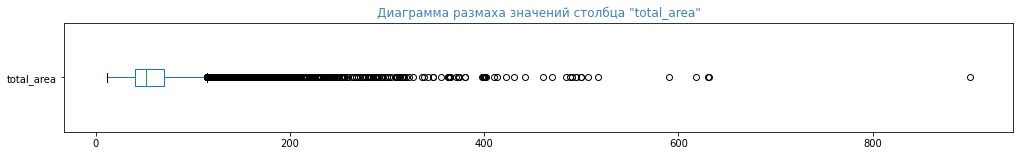

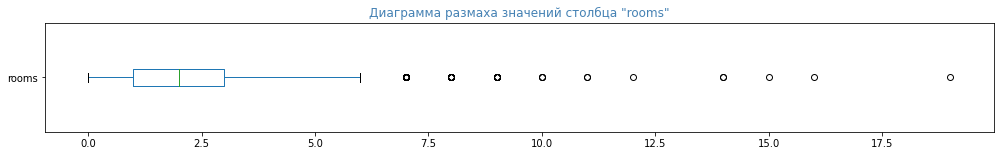

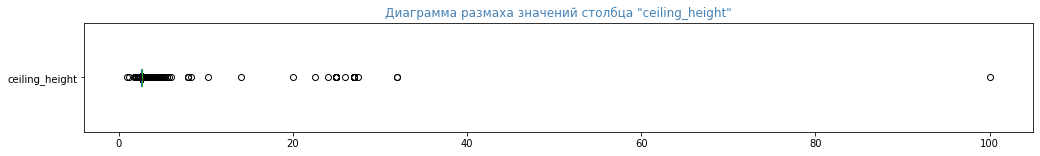

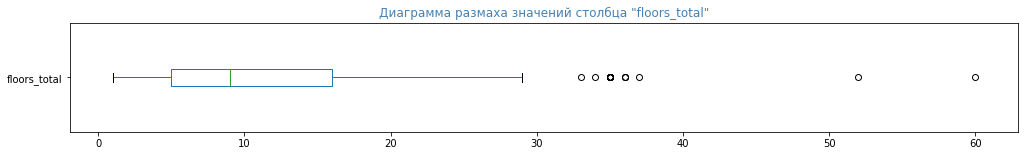

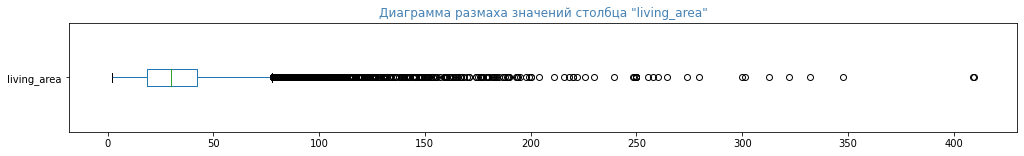

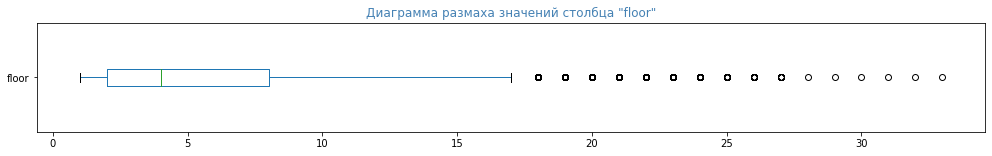

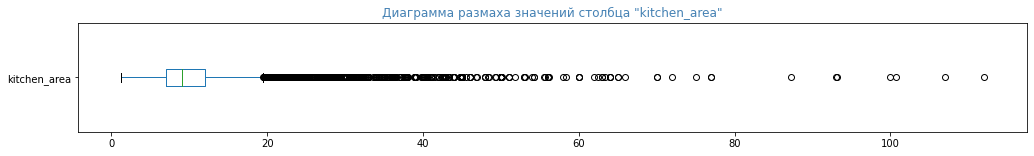

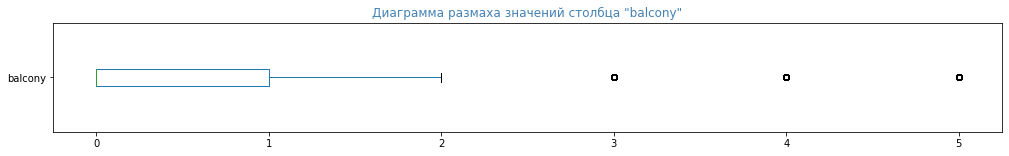

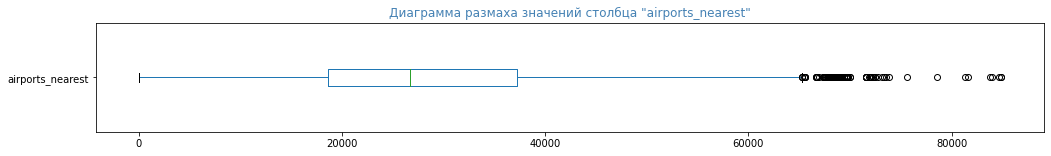

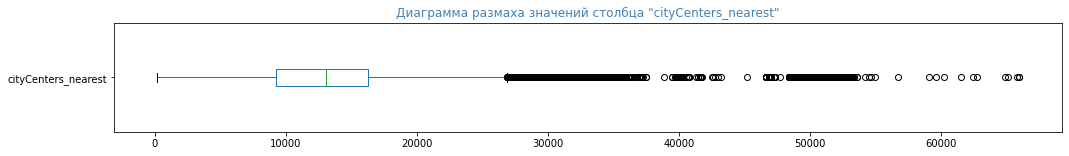

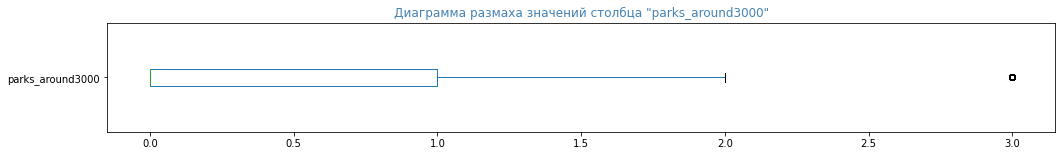

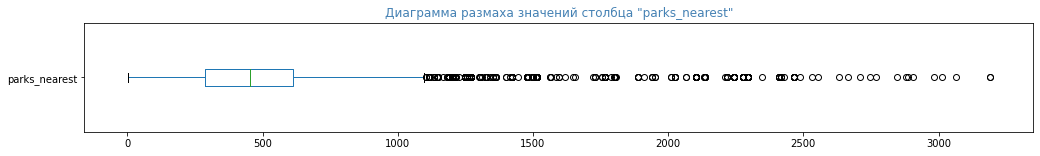

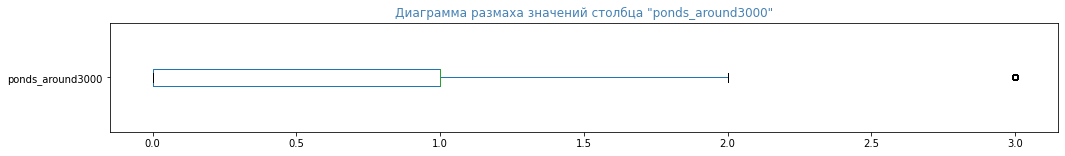

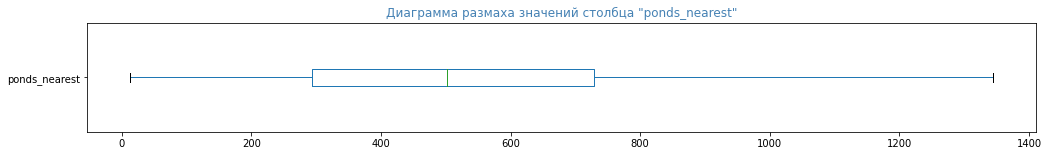

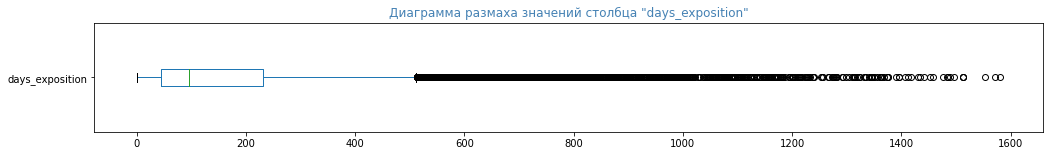

In [34]:
for dtype, name in zip(data.dtypes, data.columns):
    if (dtype == 'float64' or dtype == 'int64'):
        data[name].plot(kind='box', vert = False, figsize = (17, 2))
        plt.title(f'Диаграмма размаха значений столбца "{name}"', color = 'SteelBlue')
        plt.show()
    else:
        continue

В дополнительном исследование и обработке аномальных значений нуждаются столбцы:

* `last_price`


* `total_area`


* `rooms`


* `ceiling_height`


* `floors_total`


* `living_area`


* `kitchen_area`


* `days_exposition`

**Столбец** – `last_price`

Построим гистограмму.

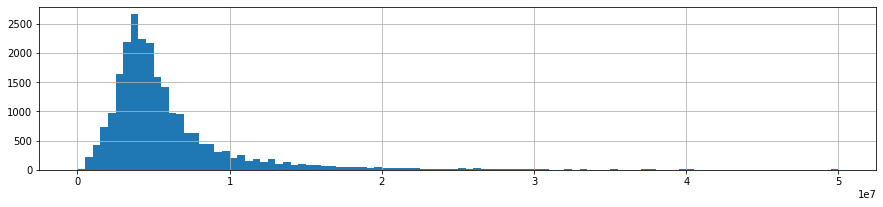

In [36]:
data.last_price.hist(bins = 100, figsize = (15,3), range = (0, 50000000));

Видно, что все квартиры стоимостью от 30000000 млн. и более можно считать редкостями. Избавимся от этих значений.

In [119]:
data = data.loc[(data.last_price < 30_000_000) | data.last_price.isna()]

Еще раз построим гистограмму.

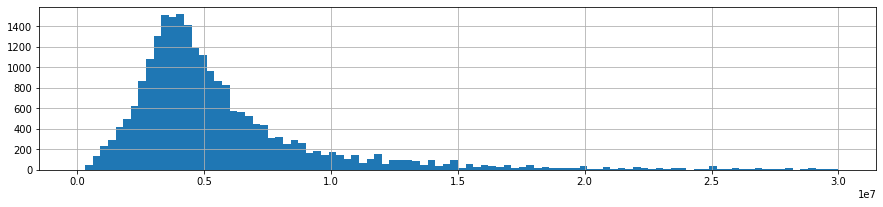

In [38]:
data.last_price.hist(bins = 100, figsize = (15,3));

Аномальные значения успешно удалены.

 Столбец `total_area`.

Построим гистограмму.

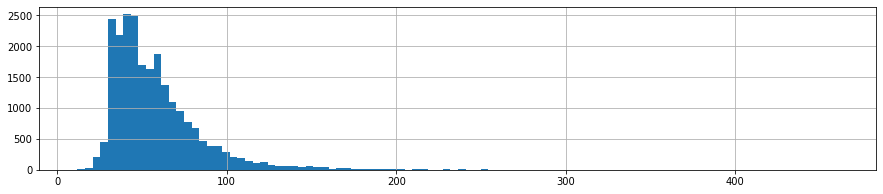

In [39]:
data.total_area.hist(bins = 100, figsize = (15,3));

Видно, что все квартиры менее 20-ти и более 250-ти квадратных метров можно считать редкими значениями. Избавмися от них.

In [40]:
data = data.loc[(data.total_area > 20) & (data.total_area < 250)]

Еще раз построим гистограмму.

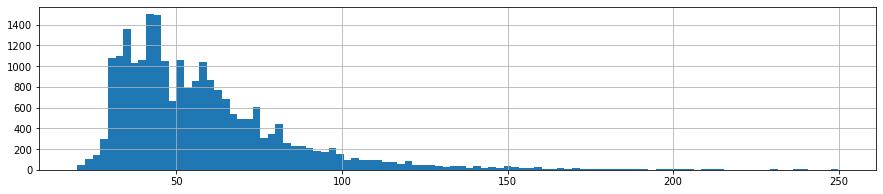

In [41]:
data.total_area.hist(bins = 100, figsize = (15,3));

Аномальные значения успешно удалены.

Столбец `rooms`.

Вывведем количество значений в данных для каждого этажа.

In [42]:
data.rooms.value_counts().to_frame()

,rooms
1,8018
2,7917
3,5710
4,1105
5,256
0,186
6,70
7,33
8,6
9,2


Видно, что количество объявлений с параметром этажа более `7` – являются редкими значениями, поэтому избавимся от них.

In [43]:
data = data.loc[data.rooms <= 7]

Еще раз вывведем количество значений в данных для каждого этажа

In [44]:
data.rooms.value_counts().to_frame()

,rooms
1,8018
2,7917
3,5710
4,1105
5,256
0,186
6,70
7,33


Редкие значения успешно удалены.

Столбец – `ceiling_height`.

Построим гистограмму.

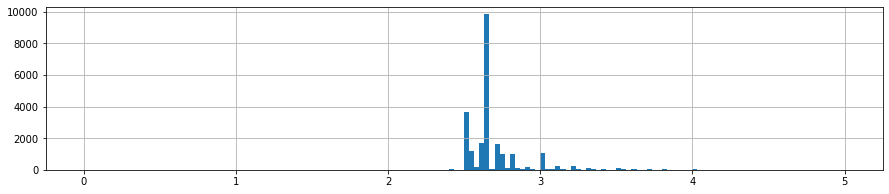

In [45]:
data.ceiling_height.hist(bins = 150, figsize = (15,3), range = (0, 5));

Видно, что все квартиры c потолками меньше 2.4 м. и более 4 м. можно считать редкими значениями. Избавмися от них.

In [46]:
data = data.loc[((data.ceiling_height > 2.4) & (data.ceiling_height < 4)) | data.ceiling_height.isna()]

Еще раз построим гистограмму.

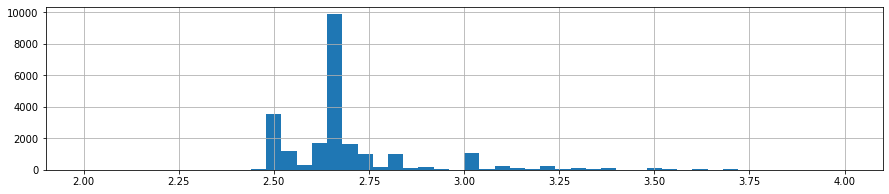

In [47]:
data.ceiling_height.hist(bins = 50, figsize = (15,3), range = (2, 4));

Редкие значения успешно удалены.

Столбец `floors_total`.

Выведем количество значений в данных для каждого количества этажей.

In [48]:
data.floors_total.value_counts().to_frame()

,floors_total
5.0,5650
9.0,3721
16.0,1367
12.0,1345
10.0,1162
4.0,1150
25.0,1072
6.0,844
17.0,826
3.0,640


Видно, что количество объявлений с параметром количества этажей более: `35`, `1`, `28`, `36`, `34`, `60`, `33`, `29`, `1`, `52` – являются редкими значениями, поэтому избавимся от них.

In [49]:
data = data.query("floors_total not in [35,1,28,36,34,60,33,29,1,52]")

Еще раз выведем количество значений в данных для каждого количества этажей.

In [50]:
data.floors_total.value_counts().to_frame()

,floors_total
5.0,5650
9.0,3721
16.0,1367
12.0,1345
10.0,1162
4.0,1150
25.0,1072
6.0,844
17.0,826
3.0,640


Редкие значений успешно удалены.

Столбец `living_area`.

Поcтроим гистограмму.

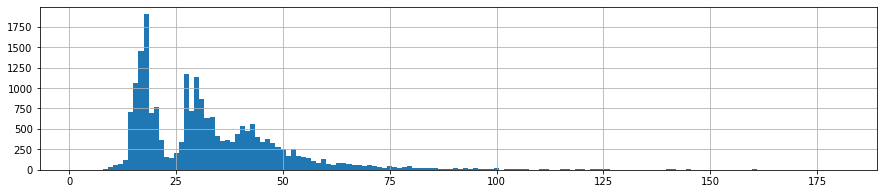

In [51]:
data.living_area.hist(bins = 150, figsize = (15,3));

Видно, что все квартиры с жилой площадью меньше 10 и больше 130 можно считать редкими значениями. Избавмися от них.

In [52]:
data = data.loc[((data.living_area < 130) & (data.living_area > 10)) | (data.living_area.isna())]

Еще раз построим гистограмму.

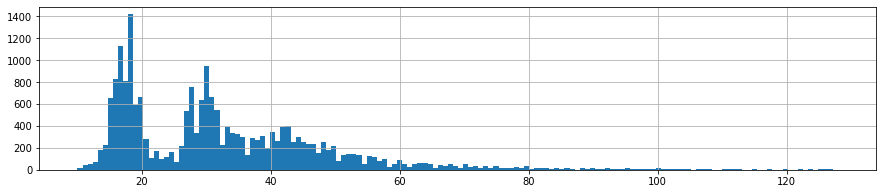

In [53]:
data.living_area.hist(bins = 150, figsize = (15,3));

Редкие значений успешно удалены.

Столбец `kitchen_area`.

Поcтроим гистограмму.

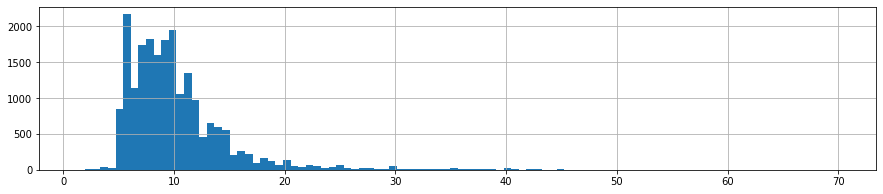

In [54]:
data.kitchen_area.hist(bins = 100, figsize = (15,3));

Видно, что все квартиры с площадью кухни меньше 4 и больше 40 можно считать редкими значениями. Избавмися от них.

In [55]:
data = data.loc[((data.kitchen_area > 4) & (data.kitchen_area < 40)) | data.kitchen_area.isna()]

Еще раз построим гистограмму.

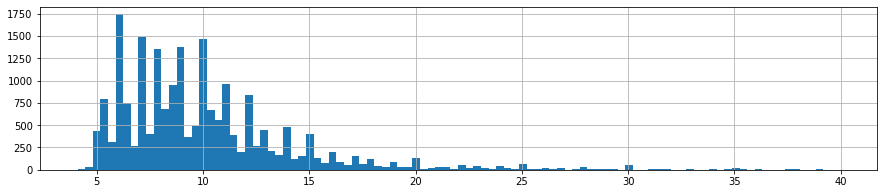

In [56]:
data.kitchen_area.hist(bins = 100, figsize = (15,3));

Редкие значений успешно удалены.

Столбец `days_exposition`.

Поcтроим гистограмму.

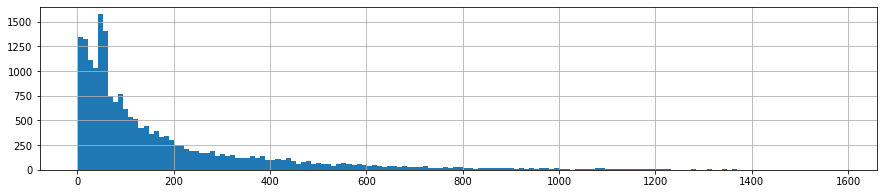

In [57]:
data.days_exposition.hist(bins = 150, figsize = (15,3));

Видно, что все квартиры с количеством дней размещения больше 1200 можно считать редкими значениями. Избавмися от них.

In [58]:
data = data.loc[(data.days_exposition < 1200) | data.days_exposition.isna()]

Еще раз поcтроим гистограмму.

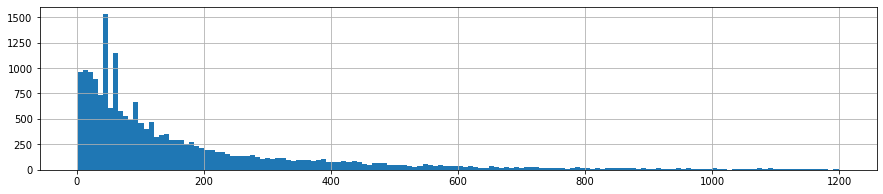

In [59]:
data.days_exposition.hist(bins = 150, figsize = (15,3));

Редкие значений успешно удалены.

**Проверим оставшиеся аномалии**

In [60]:
(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"22,770.00","22,770.00","22,770.00","19,774.00","22,770.00","20,952.00","20,606.00","22,770.00","22,690.00"
min,0.00,20.10,2.45,1.00,"430,000.00",10.08,4.10,1.00,2.00
max,7.00,240.00,3.98,"1,199.00","29,999,000.00",128.00,39.90,27.00,27.00


Все аномалии удалены!

## Добавление новых столбцов

Добавим новые столбцы:

* цена одного квадратного метра


* день недели публикации объявления (0 – понедельник, 1 – вторник и т.д)


* месяц публикации объявления


* год публикации объявления


* тип этажа квартиры (значения — «первый», «последний», «другой»)


* расстояние до центра города в километрах, округленное до целых значений)


In [70]:
data['price_per_square_m'] = data['last_price'] / data['total_area'] # цена одного квадратного метра

data['day_week'] = pd.to_datetime(data['first_day_exposition'], format = '%Y%m%dT').dt.weekday # день недели публикации

data['month'] = pd.to_datetime(data['first_day_exposition'], format = '%Y%m%dT').dt.month # месяц публикации

data['year'] = pd.to_datetime(data['first_day_exposition'], format = '%Y%m%dT').dt.year # год публикации

# функция категоризации этажей
def type_of_floor(data):
    try:
        if data['floor'] == 1:
            return 'первый'
        elif data['floor'] == data['floors_total']:
            return 'последний'
        else:
            return 'другой'
    except:
        return 'Этаж отрицательный или нулевой'

data['type_floor'] = data.apply(type_of_floor, axis = 1) # категоризация этажей

data['cityCenters_neares_m'] = round(data['cityCenters_nearest'] / 1000) # расстояние до центра города в километрах

## Исследовательский анализ

Изучим следующие параметры объектов:
* общая площадь


* жилая площадь


* площадь кухни


* цена объекта


* количество комнат


* высота потолков


* этаж квартиры


* тип этажа квартиры («первый», «последний», «другой»)


* общее количество этажей в доме


* расстояние до центра города в метрах


* расстояние до ближайшего аэропорта


* расстояние до ближайшего парка


* день и месяц публикации объявления



**Общая площадь**

count    22770.000000
mean        57.293717
std         25.024090
min         20.100000
25%         40.000000
50%         51.200000
75%         68.000000
max        240.000000
Name: total_area, dtype: float64

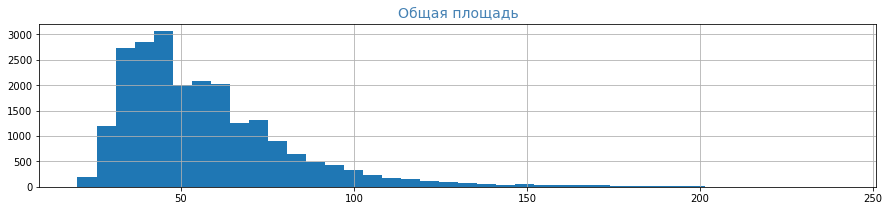

In [71]:
data['total_area'].hist(bins = 40, figsize = (15,3)).set_title('Общая площадь', fontsize = 14, color = 'SteelBlue');
data['total_area'].describe()

Общая площадь распределена от `20.1` до `240`. Чаще всего встречаются значения от `40` до `68`. Аномальных выбросов нет.

**Жилая площадь**

count    20952.00000
mean        32.79874
std         16.47864
min         10.08000
25%         18.50000
50%         30.00000
75%         41.90000
max        128.00000
Name: living_area, dtype: float64

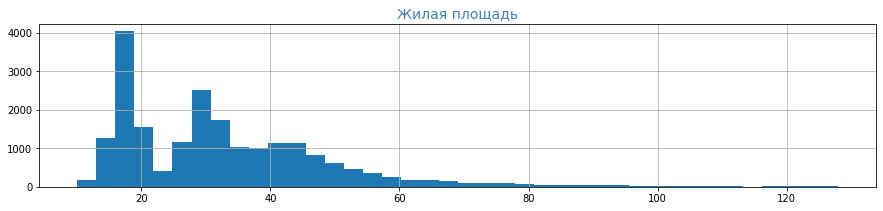

In [72]:
data['living_area'].hist(bins = 40, figsize = (15, 3)).set_title('Жилая площадь', fontsize = 14, color = 'SteelBlue');
data['living_area'].describe()

Жилая площадь распределена от `10` до `128`. Чаще всего встречаются значения от `18.5` до `41.9`. Аномальных выбросов нет.

**Площадь кухни**

count    20606.000000
mean        10.112664
std          4.447517
min          4.100000
25%          7.000000
50%          9.000000
75%         11.600000
max         39.900000
Name: kitchen_area, dtype: float64

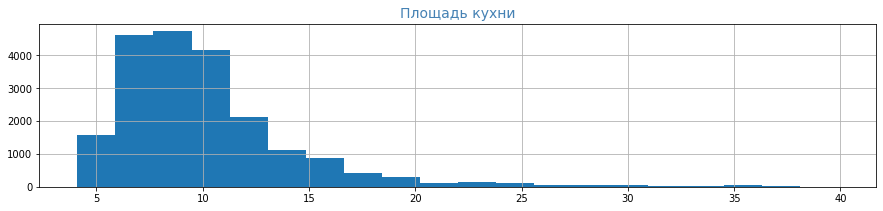

In [73]:
data['kitchen_area'].hist(bins = 20, figsize = (15, 3)).set_title('Площадь кухни', fontsize = 14, color = 'SteelBlue');
data['kitchen_area'].describe()

Жилая площадь распределена от `4` до `39.9`. Чаще всего встречаются значения от `7` до `11.6`. Аномальных выбросов нет.

**Цена объекта**

count    2.277000e+04
mean     5.623000e+06
std      3.794839e+06
min      4.300000e+05
25%      3.400000e+06
50%      4.600000e+06
75%      6.523750e+06
max      2.999900e+07
Name: last_price, dtype: float64

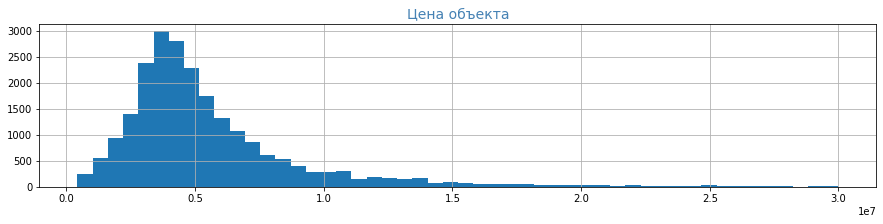

In [74]:
data['last_price'].hist(bins = 50, figsize = (15, 3)).set_title('Цена объекта', fontsize = 14, color = 'SteelBlue');
data['last_price'].describe()

Жилая площадь распределена от `430000` до `763000000`. Чаще всего встречаются значения от `3400000` до `6500000`. Аномальных выбросов нет.

**Количество комнат**

count    22770.000000
mean         2.021915
std          0.980240
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

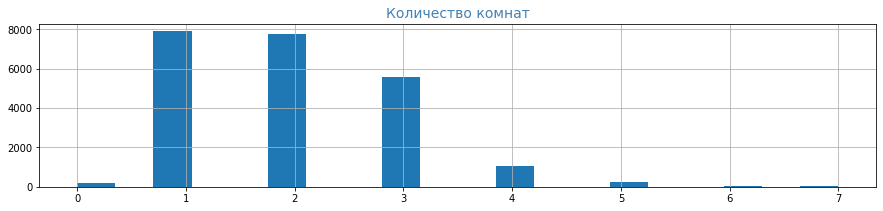

In [75]:
data['rooms'].hist(bins = 20, figsize = (15,3)).set_title('Количество комнат', fontsize = 14, color = 'SteelBlue');
data['rooms'].describe()

Количество комнат распределено от `0` до `7`. Чаще всего встречаются значения от `1` до `3`. Аномальных выбросов нет.

**Этаж**

count    22770.000000
mean         5.898551
std          4.863735
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         27.000000
Name: floor, dtype: float64

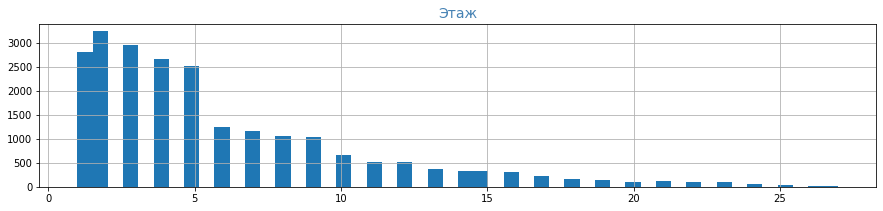

In [76]:
data['floor'].hist(bins = 50, figsize = (15,3)).set_title('Этаж', fontsize = 14, color = 'SteelBlue');
data['floor'].describe()

Номер этаж распределен от `1` до `27`. Чаще всего встречаются значения от `1` до `8`. Аномальных выбросов нет.

**Тип этажа**

count      22770
unique         3
top       другой
freq       16798
Name: type_floor, dtype: object

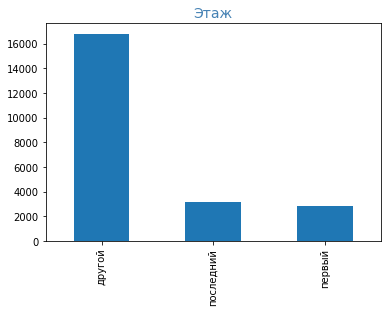

In [77]:
data['type_floor'].value_counts().plot(kind='bar').set_title('Этаж', fontsize = 14, color = 'SteelBlue');
data['type_floor'].describe()

Тип этажа принимает значения: `другой`, `последний`, `первый`. Чаще всего встречается значение `другой`. Аномальных выбросов нет.

**Общее количество этажей в доме**

count    22690.000000
mean        10.720185
std          6.529808
min          2.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         27.000000
Name: floors_total, dtype: float64

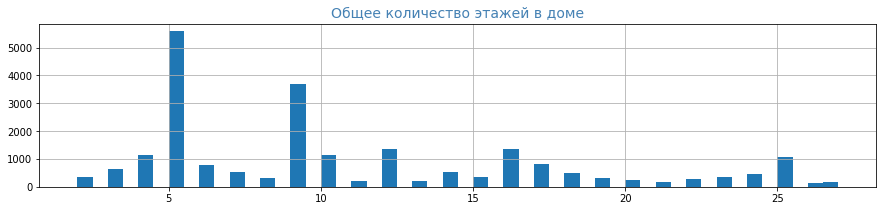

In [78]:
(
data['floors_total'].hist(bins = 50, figsize = (15, 3))
.set_title('Общее количество этажей в доме', fontsize = 14, color = 'SteelBlue')
);
data['floors_total'].describe()

Количество этажей распределено от `1` до `27`. Чаще всего встречаются значения от `5` и `9`. Аномальных выбросов нет.

**Расстояние до центра города в метрах**

count    17365.000000
mean     14414.157904
std       8555.406709
min        208.000000
25%       9719.000000
50%      13232.000000
75%      16385.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

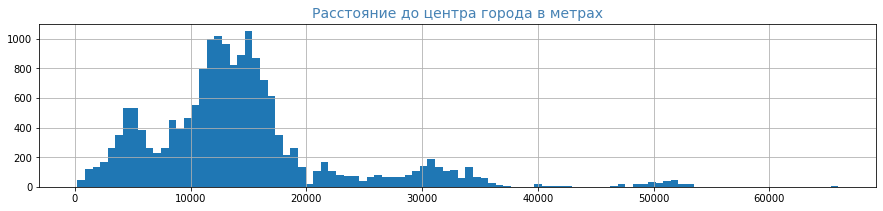

In [79]:
(
data['cityCenters_nearest'].hist(bins = 100, figsize = (15, 3))
.set_title('Расстояние до центра города в метрах', fontsize = 14, color = 'SteelBlue')
);

data['cityCenters_nearest'].describe()

Расстояние до центра города в метрах распределено от `208` до `65968`. Чаще всего встречаются значения от `9719` до `16385`. Аномальных выбросов нет.

**Расстояние до ближайшего аэропорта**

count    17345.000000
mean     28849.082906
std      12744.791394
min          0.000000
25%      18420.000000
50%      26893.000000
75%      37412.000000
max      84869.000000
Name: airports_nearest, dtype: float64

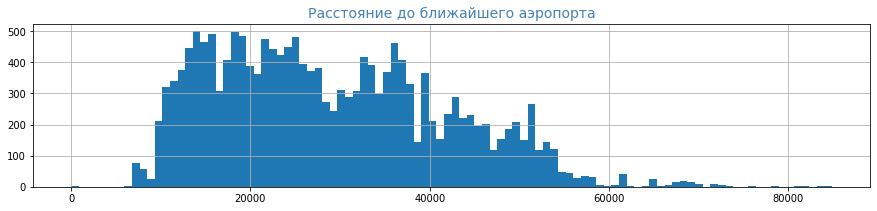

In [80]:
(
data['airports_nearest'].hist(bins = 100, figsize = (15, 3))
.set_title('Расстояние до ближайшего аэропорта', fontsize = 14, color = 'SteelBlue')
);
data['airports_nearest'].describe()

Расстояние до ближайшего аэропорта распределено от `0` до `84869`. Чаще всего встречаются значения от `18420` до `37412`. Аномальных выбросов нет.

**Расстояние до ближайшего парка**

count    7581.000000
mean      494.060942
std       341.893186
min         1.000000
25%       290.000000
50%       456.000000
75%       616.000000
max      3190.000000
Name: parks_nearest, dtype: float64

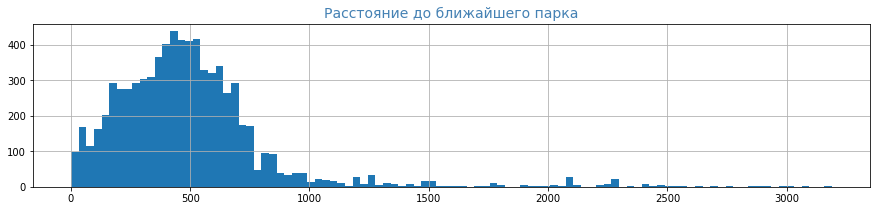

In [81]:
(
data['parks_nearest'].hist(bins = 100, figsize = (15, 3))
.set_title('Расстояние до ближайшего парка', fontsize = 14, color = 'SteelBlue')
);

data['parks_nearest'].describe()

Расстояние до ближайшего аэропорта распределено от `1` до `3190`. Чаще всего встречаются значения от `290` до `616`. Аномальных выбросов нет.

**День и месяц публикации объявления**

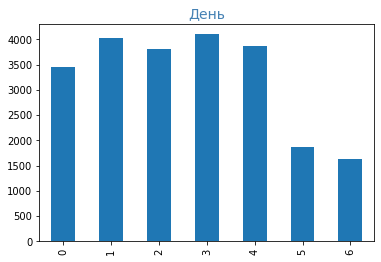

In [82]:
(
data['day_week']
    .value_counts()
    .sort_values()
    .sort_index()
    .plot(kind='bar')
    .set_title('День', fontsize = 14, color = 'SteelBlue')
);


День публикации распределено от `0` до `6` (от `понедельника` до `вторника`). Чаще всего встречаются значения от `0` до `4`, следовательно, большая часть объявлений публикуется в `будние` дни. Аномальных выбросов нет.

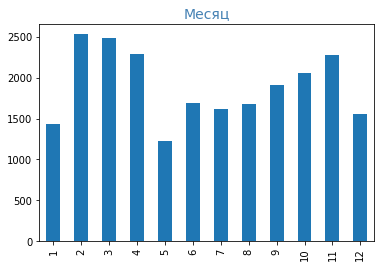

In [83]:
(
data['month']
    .value_counts()
    .sort_index()
    .plot(kind='bar')
    .set_title('Месяц', fontsize = 14, color = 'SteelBlue')
);

Месяц публикации распределено от `1` до `12` (от `января` до `декабря`). Чаще всего встречаются значения от `2`, `3`, `4`, `11`, следовательно, большая часть объявлений публикуется в эти месяца. Аномальных выбросов нет.

**Февраль оказался самым востребованным месяцем, но почему?**

Построим сводную таблицу.

In [85]:
table = data.pivot_table(index = ['year', 'month'], 
                         values = 'price_per_square_m', 
                         aggfunc = ['median', 'count'])

table.columns = ['median', 'count']
table

median  count
year month                      
2014 11     134200.000000     15
     12     102521.968366     91
2015 1       91666.666667     53
     2       91619.981326     46
     3       86956.521739     95
     4       92233.009709     43
     5       96171.399263     56
     6       94744.094488     84
     7       90795.454545     84
     8       91850.094877     82
     9       98625.956955     78
     10      92101.990050    142
     11      88801.764706    147
     12      90425.531915    141
2016 1       94827.453195    118
     2       88947.368421    245
     3       90165.094340    338
     4       89130.434783    405
     5       91973.244147    423
     6       92648.943985    444
     7       92222.222222    133
     8       86440.677966     87
     9       89643.678161    121
     10      95238.095238    117
     11      91975.463195    129
     12      89772.727273    119
2017 1       94314.932752    282
     2       93589.743590    417
     3       88054.607509    213
     4       90402.270331    622
     5       90315.475345    544
     6       88983.050847    661
     7       93495.887192    550
     8       94166.666667    707
     9       93804.824561    958
     10      90909.068182    899
     11      91799.265606   1191
     12      90678.511916    856
2018 1       93113.665995    574
     2       91346.153846   1289
     3       91729.677512    998
     4       94897.959184    293
     5      100000.000000    146
     6       94805.502846    506
     7       95603.864734    854
     8       98863.636364    798
     9       97500.000000    751
     10      95902.446085    896
     11      97909.382284    800
     12     102067.183463    351
2019 1       99903.938521    411
     2      105279.929467    538
     3      103305.785124    843
     4      102633.402633    930
     5      102601.503759     56

Видно, что в начале `2018` и `2019` года, произошел резкий рост предложений, но почему? 

**Ответ:**

Что было с ценами на недвижимость в 2018 году?

В середине 2018 года цены на жилье начали расти в большинстве регионов России. В сентябре и декабре Центральный банк России дважды поднял ключевую ставку на 25 базовых пунктов — с 7,25 до 7,75% годовых. В это же время курс доллара достиг годового пика: за девять месяцев 2018 года он вырос с 56 до 69 рублей. Всё это подстегнуло спрос: люди начали вкладывать деньги в недвижимость, так как боялись, что национальная валюта продолжит дешеветь, а ипотечные ставки — расти. Это продолжило разгонять цены на недвижимость.

Что повлияло на цены на недвижимость в 2019 году?

В первом полугодии 2019 году квартиры продолжили дорожать. Предложений на рынке стало меньше и это подогрело цены. При этом рубль укреплялся по отношению к доллару (с 67 рублей за доллар в январе до 63 в июне), а ключевая ставка в первом полугодии не менялась. В июне ЦБ понизил ставку на 25 базовых пунктов, а затем ещё один раз — до 6,25% — в декабре. 

Ссылка на источник: [Яндекс.Недвижимость](https://realty.ya.ru/journal/post/podvodim-itogi-goda-v-nedvizhimosti-snizhenie-ipotechnykh-stavok-eskrou-scheta-poyavlenie-mtsd-rekordnye-obemy-stroitelstva/)

**Как быстро продавались квартиры?**

Для ответа на данный вопрос – построим гистограмму.

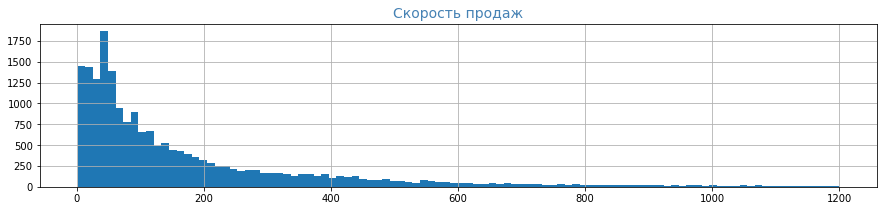

In [90]:
(
data['days_exposition'].hist(bins = 100, figsize = (15, 3))
    .set_title('Скорость продаж', fontsize = 14, color = 'SteelBlue')
);

Найдем среднее и медианное время продажи.

In [91]:
print(f'Среднее время продажи: {data["days_exposition"].mean()}')
print(f'Медианное время продажи: {data["days_exposition"].median()}')

Среднее время продажи: 174.142965510266
Медианное время продажи: 93.0


Чтобы определить сколько времени обычно занимает продажа, найдем диапозон между первым и третьим кваритилем.

In [92]:
data['days_exposition'].describe()

count    19774.000000
mean       174.142966
std        204.790538
min          1.000000
25%         44.000000
50%         93.000000
75%        225.000000
max       1199.000000
Name: days_exposition, dtype: float64

Видно, что обычно время продажи занимает от `44` до `225` дней.

Также, можно добавить, что быстрыми считаются квартиры, которые проданы с ожиданием до `44` дней, а необычно долгими более `225` дней, так как первое значение меньше первого квартиля, а второе больше третьего квартиля.

**Посмотрим на моды**

In [93]:
data.days_exposition.value_counts().to_frame().head(10)

,days_exposition
45.0,860
60.0,532
7.0,227
30.0,204
90.0,184
4.0,173
3.0,152
5.0,145
14.0,141
20.0,137


Есть сильный пик на значении `45` дней, но почему?

Посмотрим на условия размещения объявления.

Ссылка на источник [Яндекс.Справка](https://yandex.ru/support/realty/owner/home/add-ads-housing.html)

Условия публикации на квартиры до 4.5 млн. – `45` дней, поэтому и наблюдается сильный пик.  

**Измененение скорости продаж по годам**

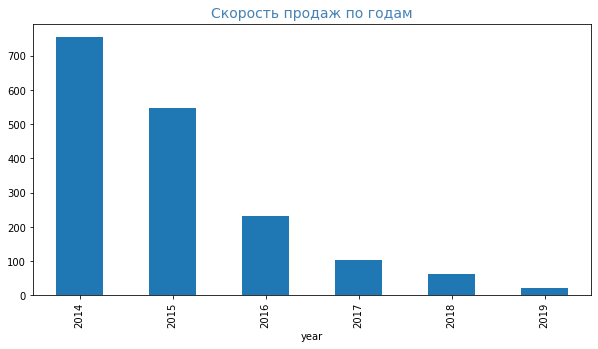

In [120]:
(
data.pivot_table(index = 'year',
                 values = 'days_exposition',
                 aggfunc = 'median')
                .plot(kind = 'bar', figsize = (10, 5), legend = False)
                .set_title('Скорость продаж по годам', 
                           fontsize = 14, 
                           color = 'SteelBlue')
);

Видно, что с `2014` по `2019` скорость продаж росла.

**Какие факторы больше всего влияют на общую стоимость объекта?**

Для ответа на данный вопрос – построим гистограмму зависимости цены от:

* общей площади


* жилой площади


* площади кухни


* количества комнат


* этажа, на котором расположена квартира (первый, последний, другой);


* даты размещения (день недели, месяц, год)

Для начала проведем категоризацию цены, чтобы нагляднее отобразить граффики.

* 0000000-1000000 – `A`

* 1000000-2000000 – `B`

* 2000000-4000000 – `C`

* 4000000-6000000 – `D` 

* 6000000-8000000 – `E`

* 8000000-10000000 – `F`

* 1000000-15000000 – `G`

* 15000000 - боллее – `H`

In [95]:
def categories_last_price(value):
    try:
        if value >= 0 and value <= 1000000:
            return 'A'
        elif value >= 1000000 and value <= 2000000:
            return 'B'
        elif value >= 2000000 and value <= 4000000:
            return 'C'
        elif value >= 4000000 and value <= 6000000:
            return 'D'
        elif value >= 6000000 and value <= 8000000:
            return 'E'
        elif value >= 8000000 and value <= 10000000:
            return 'F'
        elif value >= 10000000 and value <= 15000000:
            return 'G'
        else:
            return 'H'
    except:
        return 'False'
    
data['categories'] = data['last_price'].apply(categories_last_price)

Построим граффики для общей площади, жилой площади и площади кухни.

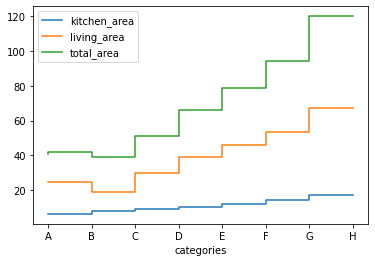

In [96]:
data.pivot_table(index = 'categories',
                 values = ['total_area', 
                           'living_area', 
                           'kitchen_area'], 
                 aggfunc = 'median').plot(drawstyle = 'steps');

Расчитаем коэффициент корреляции.

In [97]:
print(f'Значение корреляции для "total_area": {data["total_area"].corr(data["last_price"])}')

print(f'Значение корреляции "living_area": {data["living_area"].corr(data["last_price"])}')

print(f'Значение корреляции "kitchen_area": {data["kitchen_area"].corr(data["last_price"])}')

Значение корреляции для "total_area": 0.7803837469986633
Значение корреляции "living_area": 0.6730346504346666
Значение корреляции "kitchen_area": 0.5927685632393511


Построим точечные диаграммы.

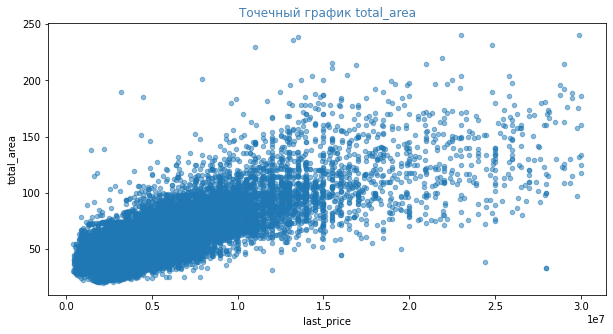

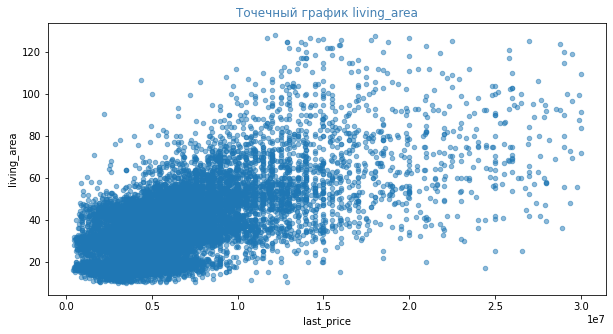

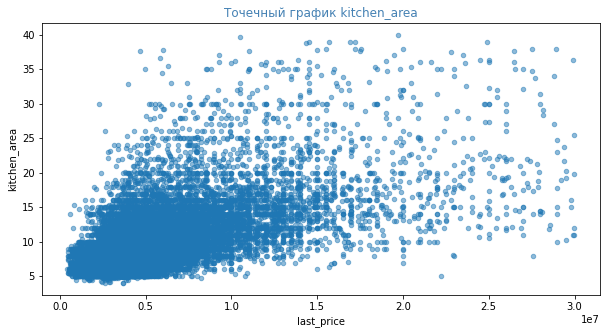

In [98]:
for table in ['total_area', 'living_area', 'kitchen_area']:
    (
        data.plot(x = 'last_price',
                  y = table ,kind = 'scatter',
                  alpha = 0.5, figsize = (10, 5))
        .set_title(f'Точечный график {table}', 
                   color = 'SteelBlue')
    )

Построим граффики для: `количества комнат`, `этажа`, `даты`.

Столбце `rooms`

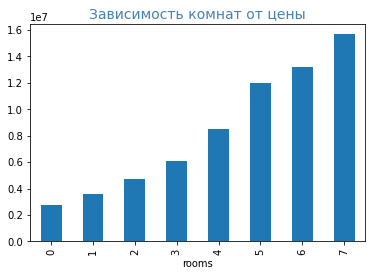

In [99]:
(
data.pivot_table(index = 'rooms',
                 values = 'last_price',
                 aggfunc = 'median').plot(kind = 'bar', legend=False)
.set_title('Зависимость комнат от цены', 
           fontsize = 14, 
           color = 'SteelBlue')
);

Расчитаем коэффициент корреляции.

In [100]:
print(f'Значение корреляции: {data["rooms"].corr(data["last_price"])}')

Значение корреляции: 0.4965576491282683


Столбец `type_floor`

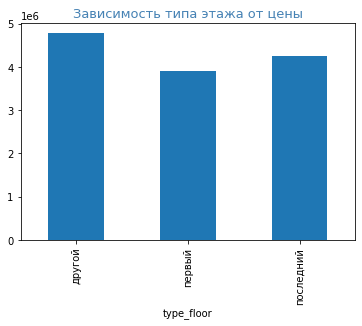

In [101]:
(
data.pivot_table(index = 'type_floor',
                 values = 'last_price',
                 aggfunc = 'median').plot(kind = 'bar', legend = False)
.set_title('Зависимость типа этажа от цены', 
           fontsize = 13, 
           color = 'SteelBlue')
);

Зависимости нет.

Построим граффик для `day_week`.

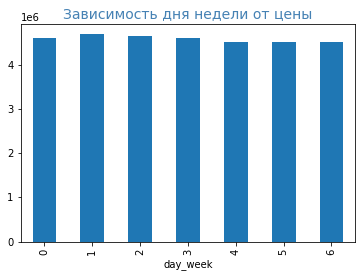

In [102]:
(
data.pivot_table(index = 'day_week',
                 values = 'last_price',
                 aggfunc = 'median')
.plot(kind = 'bar', legend = False)
.set_title('Зависимость дня недели от цены', 
           fontsize = 14, 
           color = 'SteelBlue')
);

Расчитаем коэффициент корреляции.

In [103]:
print(f'Значение корреляции: {data["day_week"].corr(data["last_price"])}')

Значение корреляции: -0.02000740302798959


Столбец `month`

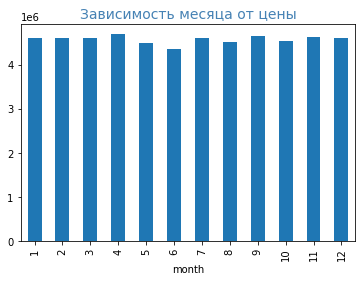

In [104]:
(
data.pivot_table(index = 'month',
                 values = 'last_price',
                 aggfunc = 'median').plot(kind = 'bar', legend = False)
.set_title('Зависимость месяца от цены', 
           fontsize = 14, 
           color = 'SteelBlue')
);

Расчитаем коэффициент корреляции.

In [105]:
print(f'Значение корреляции: {data["month"].corr(data["last_price"])}')

Значение корреляции: 0.0047043489418290155


Построим граффик для `year`.

In [106]:
data.pivot_table(index = 'year',
                 values = ['total_area', 'last_price'],
                 aggfunc = ['median', 'count'])

median                 count           
     last_price total_area last_price total_area
year                                            
2014  6625000.0     70.950        106        106
2015  5100000.0     58.000       1051       1051
2016  4490000.0     52.470       2679       2679
2017  4480000.0     51.000       7900       7900
2018  4544000.0     50.095       8256       8256
2019  5000000.0     51.200       2778       2778

Видно, что с каждым годом число объявлений росло, а площадь квартир падала, как и стоимость квартир.

**Вывод:**

Исходя из полученных результатов, можно сделать вывод, что больше всего влияют на общую стоимость объекта:

* `rooms`


* `living_area`


* `total_area`


* `year`

**Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений и выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.**

Найдем 10 населенных пунктов с наибольшим числом объявлений и сохраним в переменную `top`.

In [107]:
top = data['locality_name'].value_counts().head(10).index
top

Index(['Санкт-Петербург', 'поселок Мурино', 'поселок Шушары', 'Всеволожск',
       'Пушкин', 'Колпино', 'поселок Парголово', 'Гатчина', 'деревня Кудрово',
       'Выборг'],
      dtype='object')

Посчитаем среднюю цену одного квадратного метра.

In [108]:
max_m = data.loc[data["locality_name"].isin(top), "price_per_square_m"].mean()
print(f'Цена одного квадратного метра в 10 населённых пунктах с\nнаибольшим числом объявлений = {max_m}')

Цена одного квадратного метра в 10 населённых пунктах с
наибольшим числом объявлений = 104969.90545703736


Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.

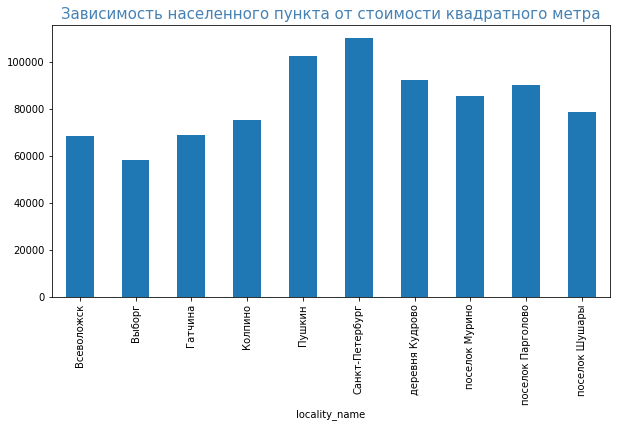

In [109]:
(
data.loc[data['locality_name'].isin(top)].pivot_table(index = 'locality_name', values = 'price_per_square_m')
    .plot(kind = 'bar', legend = False, figsize = (10, 5))
    .set_title('Зависимость населенного пункта от стоимости квадратного метра',  fontsize = 15, color = 'SteelBlue')
);

Из графика видно, что:
    
* Населённый пункт с самой высокой ценой одного квадратного метра – `Санкт-Петербург`


* Населённый пункт с самой низкой ценой одного квадратного метра – `Выборг`

Построим графиик срдней цены каждого киллометра.

In [110]:
table = data.loc[data['locality_name'] == 'Санкт-Петербург'].pivot_table(
    index = 'cityCenters_neares_m', 
    values = 'last_price')
table

,last_price
cityCenters_neares_m,
0.0,1.129077e+07
1.0,1.144421e+07
2.0,1.059874e+07
3.0,9.566583e+06
4.0,1.005521e+07
5.0,1.058565e+07
6.0,9.373322e+06
7.0,9.197772e+06
8.0,8.664881e+06


Для наглядности построим столбчатую диаграмму.

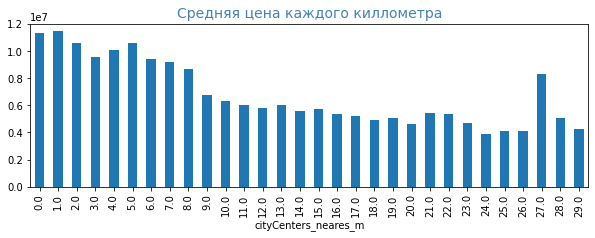

In [111]:
(
    
table.plot(kind = 'bar', legend = False, figsize = (10, 3))
    .set_title('Средняя цена каждого киллометра', 
               fontsize = 14, 
               color = 'SteelBlue')
    
);

Из графика видно: чем дальше квартира от центра горда, тем она дешевле.

Также, на графике виден выброс на 27 км., изучим его.

In [112]:
data.loc[data['locality_name'] == 'Санкт-Петербург'].pivot_table(index = 'cityCenters_neares_m', values = ['price_per_square_m', 'kitchen_area'])

,kitchen_area,price_per_square_m
cityCenters_neares_m,,
0.0,12.466667,116000.380792
1.0,12.706304,141706.154328
2.0,13.906360,126757.700664
3.0,13.136020,115264.358194
4.0,12.735577,124251.797566
5.0,13.418437,131886.595579
6.0,12.426571,131204.078918
7.0,11.851059,131429.936689
8.0,11.581586,123064.136775


Из значений видно, что сильный всплекск из-за высокой цена за 1 кв. м , и из-за резкого увелечения площади кухни.

## Вывод

Подводя итоги, сделаем выводы по каждому пункту:
1. Обзор данных 

2. Предобработка данных

3. Добавление новых столбцов

4. Исследовательский анализ

**Обзор данных**

В работе были ипользованы и обработаны данные о `продаже квартир`. О качестве данных инормации не было, поэтому была проведена тщательная предобработка.

**Предобработка данных**

В ходе работы были найдены и исправлены следующие ошибки:
* измененены типы данных 
* устранены неявные дубликаты
* обработаеы аномальные значения

**Добавление новых столбцов** 

Были добавлены новые столбцы:

* цена одного квадратного метра


* день недели публикации объявления (0 – понедельник, 1 – вторник и т.д)


* месяц публикации объявления


* год публикации объявления


* тип этажа квартиры (значения — «первый», «последний», «другой»)


* расстояние до центра города в километрах, округленное до целых значений)

**Исследовательский анализ**

Были изучены следующие параметры:

* общая площадь


* жилая площадь


* площадь кухни


* цена объекта


* количество комнат


* высота потолков


* этаж квартиры


* тип этажа квартиры («первый», «последний», «другой»)


* общее количество этажей в доме


* расстояние до центра города в метрах


* расстояние до ближайшего аэропорта


* расстояние до ближайшего парка


* день и месяц публикации объявления


Найдены факторы больше всего влияющие на общую стоимость объекта:

* `rooms`


* `living_area`


* `total_area`


* `year`

Посчитана средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений, а именно: `104969.90545703736` за один квадратный метр.

Выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра:

* Населённый пункт с самой высокой ценой одного квадратного метра – `Санкт-Петербург`

* Населённый пункт с самой низкой ценой одного квадратного метра – `Выборг`